# Digital Mobile on the frontline in the war against Coronavirus. 
Case of Medic Mobile


<img src="images/africa.png" alt="Drawing" style="width: 200px;"/>


# Introduction

The year 2020 will be remembered for the most devastating health outbreak since the Spanish flu about 100 years ago: covid-19. To some extent, every country has been affected by the pandemic one way or another and its effect on nations’ healthcare system, economics and general overall welfare are yet to be seen. 
In this article we will explore how the virus spread across Africa, with a particular focus on countries most affected, the state of affairs at the moment (are things getting any better) and finally the role of digital media in managing the pandemic.
The analysis is done using Covid-19  data from the World Health Organization (WHO)  to answer the first two questions; and stories from one of the most active organizations in the digital health space in Africa : Medic Mobile (to answer the third question), at times in collaboration with another big player in the space: Dumagi.

# 1. Business Understanding¶


1. What is the state of affairs across Africa
2. What are the most affected countries
3. What role are digital health platform playing in combating the pandemic

# 2. Data Understanding  

## Required dependancies.
First we import required dependance for data analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import os
import urllib
#geoplot
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot, iplot
%matplotlib inline 

In [2]:
# load utility file
%run utils.py

# Download and save data on disk
The data is dowloaded from WHO dashboard and saved to local disk

In [3]:
url ='https://covid19.who.int/WHO-COVID-19-global-data.csv'
df = load_data(url)

# Data Preprocessing

Data formatting 

In [4]:
#Quick look at data format 
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-02-24,AF,Afghanistan,EMRO,5,5,0,0
1,2020-02-25,AF,Afghanistan,EMRO,0,5,0,0
2,2020-02-26,AF,Afghanistan,EMRO,0,5,0,0
3,2020-02-27,AF,Afghanistan,EMRO,0,5,0,0
4,2020-02-28,AF,Afghanistan,EMRO,0,5,0,0


In [5]:
#Quick look at features
df.columns

Index(['Date_reported', ' Country_code', ' Country', ' WHO_region',
       ' New_cases', ' Cumulative_cases', ' New_deaths', ' Cumulative_deaths'],
      dtype='object')

In [6]:
# There seem to be white space in some columns (all except first one) - let's get read of them
remove_white_spaces(df)
df.columns  

Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')

Missing values

In [7]:
#Let us look if there are null vlaues in the dataset
df.isnull().sum()

Date_reported          0
Country_code         163
Country                0
WHO_region             0
New_cases              0
Cumulative_cases       0
New_deaths             0
Cumulative_deaths      0
dtype: int64

In [8]:
#Since 'Country_code' is not very importnat 
#for our analysis (we have country column already), we can drop the columns altogether 
df.drop('Country_code', axis=1, inplace=True)

Feature engineering

In [9]:
# We might find it useful to analyse monthly/yearly stats
#So let's format the date feature to allow for this 
feature_engineer_dates(df, 'Date_reported')

In [10]:
#Check new features
df.tail()

,Date_reported,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,month,year
36836,2020-08-19,Zimbabwe,AFRO,70,5378,6,141,8,2020
36837,2020-08-20,Zimbabwe,AFRO,265,5643,9,150,8,2020
36838,2020-08-21,Zimbabwe,AFRO,102,5745,1,151,8,2020
36839,2020-08-22,Zimbabwe,AFRO,70,5815,1,152,8,2020
36840,2020-08-23,Zimbabwe,AFRO,78,5893,1,153,8,2020


# Exploratory data analysis 

Useful data subset

In [11]:
#Since we are interested in countries in the 'AFRO' region, lets just select that
df_africa = df[df.WHO_region == 'AFRO']
df_africa.head()

,Date_reported,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,month,year
350,2020-02-25,Algeria,AFRO,5,5,0,0,2,2020
351,2020-02-26,Algeria,AFRO,0,5,0,0,2,2020
352,2020-02-27,Algeria,AFRO,0,5,0,0,2,2020
353,2020-02-28,Algeria,AFRO,0,5,0,0,2,2020
354,2020-02-29,Algeria,AFRO,0,5,0,0,2,2020


In [12]:
#let us have a look at countries names for consistency 
df_africa.Country.unique()


array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic',
       'Chad', 'Comoros', 'Congo', 'Côte d’Ivoire',
       'Democratic Republic of the Congo', 'Equatorial Guinea', 'Eritrea',
       'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea',
       'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Madagascar',
       'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Mayotte',
       'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Réunion', 'Rwanda',
       'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone',
       'South Africa', 'South Sudan', 'Togo', 'Uganda',
       'United Republic of Tanzania', 'Zambia', 'Zimbabwe'], dtype=object)

In [13]:
#'Côte d’Ivoire' is reported with a French name. Let us replace it with English name for consistency 
rename_country(df,"Côte d’Ivoire", "Ivory Coast")
df_africa.Country.unique()

array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic',
       'Chad', 'Comoros', 'Congo', 'Côte d’Ivoire',
       'Democratic Republic of the Congo', 'Equatorial Guinea', 'Eritrea',
       'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea',
       'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Madagascar',
       'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Mayotte',
       'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Réunion', 'Rwanda',
       'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone',
       'South Africa', 'South Sudan', 'Togo', 'Uganda',
       'United Republic of Tanzania', 'Zambia', 'Zimbabwe'], dtype=object)

## 1. What's the state of affairs with regard to covid-19 in Africa ?

### Data visualization


In [14]:
#Let's get yesterday's data = => latest 
df_africa_latest = select_latest_data(df_africa)
df_africa_latest.head()

,Date_reported,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,month,year
530,2020-08-23,Algeria,AFRO,810,41068,13,1424,8,2020
860,2020-08-23,Angola,AFRO,66,2134,0,94,8,2020
3616,2020-08-23,Benin,AFRO,0,2115,0,39,8,2020
4571,2020-08-23,Botswana,AFRO,0,1308,0,3,8,2020
5404,2020-08-23,Burkina Faso,AFRO,0,1297,0,55,8,2020


Data Visualization on map

In [15]:
visualize_on_map(df_africa_latest,'africa','covid-map.html')

# Data Modeling 

## 2. Which countries have most cases?

In [16]:
%run utils.py 
sorted = sort_by_stats(df_africa_latest, 'Cumulative_cases', False)
top10 = sorted.head(10)
top10


,Date_reported,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,month,year
31660,2020-08-23,South Africa,AFRO,3707,607045,144,12987,8,2020
24598,2020-08-23,Nigeria,AFRO,601,51905,1,997,8,2020
13105,2020-08-23,Ghana,AFRO,0,43325,0,261,8,2020
530,2020-08-23,Algeria,AFRO,810,41068,13,1424,8,2020
11005,2020-08-23,Ethiopia,AFRO,1368,39033,25,662,8,2020
18276,2020-08-23,Kenya,AFRO,355,32118,10,542,8,2020
6087,2020-08-23,Cameroon,AFRO,0,18762,0,408,8,2020
7972,2020-08-23,Côte d’Ivoire,AFRO,64,17374,1,113,8,2020
20390,2020-08-23,Madagascar,AFRO,59,14277,0,178,8,2020
30132,2020-08-23,Senegal,AFRO,161,12850,4,266,8,2020


# Countries with least cases

In [17]:
bottom10 = sorted.tail(10)
bottom10

,Date_reported,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,month,year
27951,2020-08-23,Réunion,AFRO,42,1117,1,6,8,2020
19396,2020-08-23,Lesotho,AFRO,0,1015,0,30,8,2020
6783,2020-08-23,Chad,AFRO,1,982,0,76,8,2020
29782,2020-08-23,Sao Tome and Principe,AFRO,1,892,0,15,8,2020
35308,2020-08-23,United Republic of Tanzania,AFRO,0,509,0,21,8,2020
5549,2020-08-23,Burundi,AFRO,1,430,0,1,8,2020
7476,2020-08-23,Comoros,AFRO,11,417,0,7,8,2020
21728,2020-08-23,Mauritius,AFRO,0,346,0,10,8,2020
10500,2020-08-23,Eritrea,AFRO,0,306,0,0,8,2020
30465,2020-08-23,Seychelles,AFRO,0,127,0,0,8,2020


Remarks - south africa seems to be most affected... Obviously the total number does not tell the whole story.A look at cases per capita would be more significant, but a glance at the population figures shows that the most populated countries do not necessarily have most cases (Indeed, South africa is 6th on the continent, https://en.wikipedia.org/wiki/List_of_African_countries_by_population) . Also a point to note is that the picture migh reflect the capacity for testing rather than the actual numbers. For the sake of simplicity, we will use the data we have, keeping in mind those caveats as we draw conclusions.

In [18]:
# extract tables from wikipedia
page ='https://en.wikipedia.org/wiki/List_of_African_countries_by_population'

In [19]:
population = read_wikipedia_table(page)
population.head(10) 

,Rank,Country(or dependent territory),Officialfigure(whereavailable),Date oflast figure,Source
0,1.0,Nigeria,206139589,2020,Worldometers[3]
1,2.0,Ethiopia,114963588,2020,Worldometers
2,3.0,Egypt,102334404,2020,Worldmeters
3,4.0,Democratic Republic of the Congo,89561403,2020,Worldmeters
4,5.0,Tanzania,59734218,2020,Worldometers
5,6.0,South Africa,59622350,"July 1, 2020",Official estimate
6,7.0,Kenya,47564296,2019,Official estimate
7,8.0,Uganda,45741007,"July,13, 2020",https://www.worldometers.info
8,9.0,Algeria,43000420,"January 1, 2019",Official estimate
9,10.0,Sudan,42268269,"January 25, 2020",Official population clock


In [20]:
#countries with more cases but less people
#df of top countries 
population[population['Country(or dependent territory)'].isin (top10.Country)]

,Rank,Country(or dependent territory),Officialfigure(whereavailable),Date oflast figure,Source
0,1.0,Nigeria,206139589,2020,Worldometers[3]
1,2.0,Ethiopia,114963588,2020,Worldometers
5,6.0,South Africa,59622350,"July 1, 2020",Official estimate
6,7.0,Kenya,47564296,2019,Official estimate
8,9.0,Algeria,43000420,"January 1, 2019",Official estimate
12,13.0,Ghana,31072940,2020,Official estimate
16,17.0,Madagascar,22434363,2014,Official estimate
17,18.0,Cameroon,21917602,2015,Official estimate
23,24.0,Senegal,14354690,2015,Official estimate


# More plot - top 10

In [21]:
df_top10 = df_africa[df_africa.Country.isin (top10.Country)]
df_top10.Country.unique()
top10.Country

31660     South Africa
24598          Nigeria
13105            Ghana
530            Algeria
11005         Ethiopia
18276            Kenya
6087          Cameroon
7972     Côte d’Ivoire
20390       Madagascar
30132          Senegal
Name: Country, dtype: object

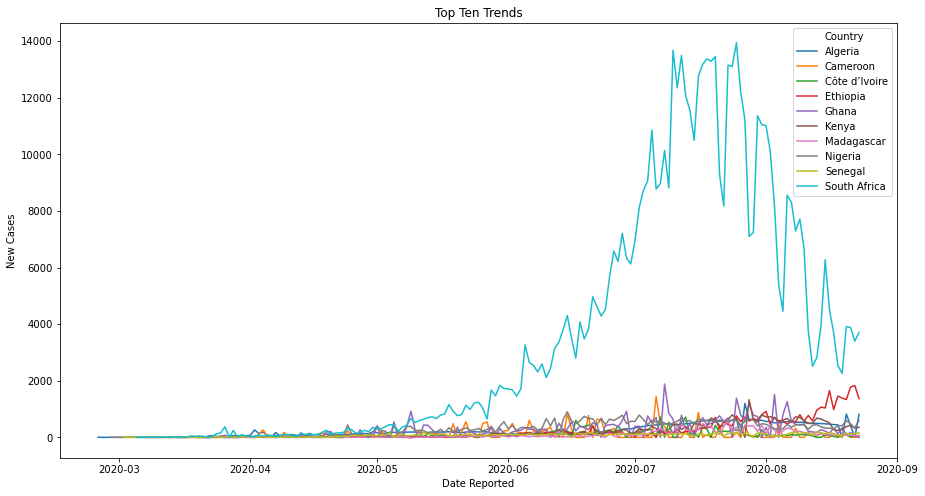

In [22]:
#top ten news cases time series   
visualize_with_plot('Top Ten Trends', df_top10, 'Date_reported', 'New_cases', 'Date Reported','New Cases')     

 Exclude South Africa

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



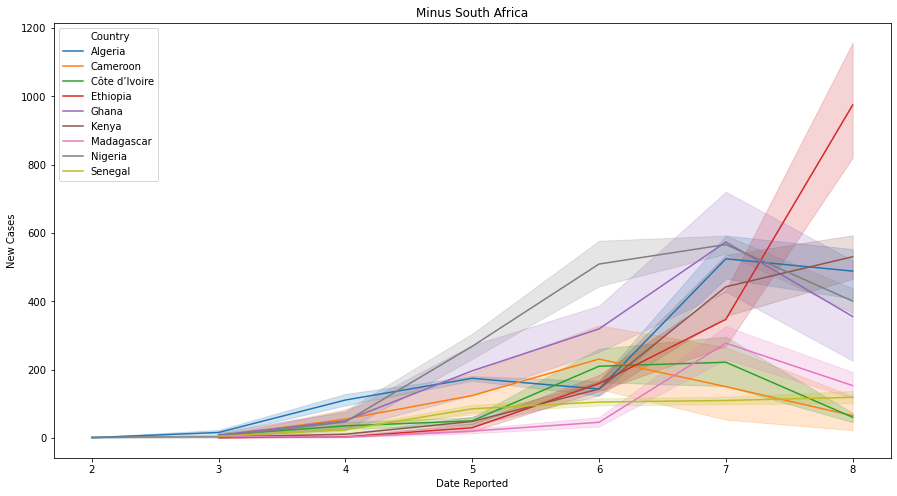

In [23]:
#Minus sa and show per month
minus_sa = df_top10[df.Country != 'South Africa']
visualize_with_plot('Minus South Africa', minus_sa, 'month', 'New_cases', 'Date Reported','New Cases')     

Most contries seem to have picked - Except Ethiopia. Zoom into Ethiopia - 
Use date reported

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



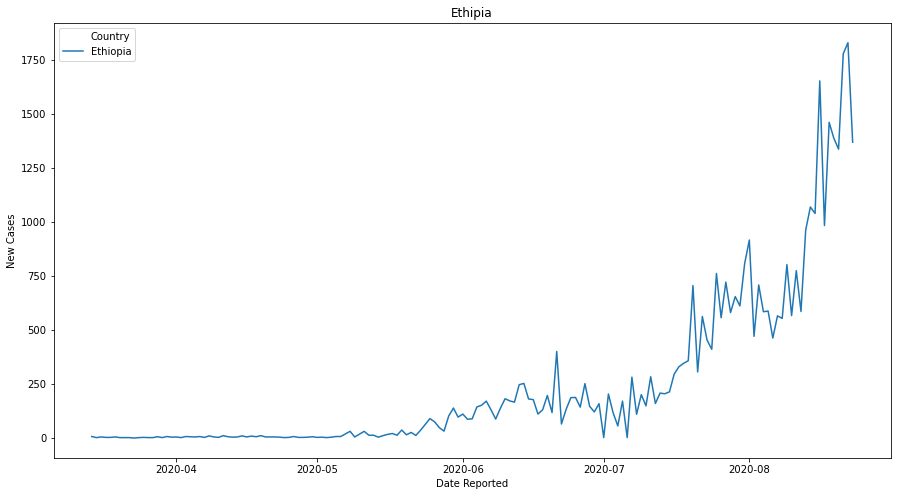

In [24]:
visualize_with_plot('Ethipia', df_top10[df.Country == 'Ethiopia'], 'Date_reported', 'New_cases', 'Date Reported','New Cases')     

Might have peaked as well

# Results Evaluation

At a glance, South Africa seems to be the most affected country on the continent. 
Obviously the total number does not tell the whole story.A look at cases per capita would be more significant, but a glance at the population figures shows that the most populated countries do not necessarily have most cases (Indeed, South africa is 6th on the continent, https://en.wikipedia.org/wiki/List_of_African_countries_by_population) . Also a point to note is that the picture might reflect the capacity for testing rather than the actual numbers. For the sake of simplicity, we will use the data we have, keeping in mind those caveats as we draw conclusions.
Also, most countries have peaked, except Ethiopia (viewed on a monthly scale), but as we approach the end of August, we see some downwards trends.


# Conclusion

Like the rest of the world, Africa has been affected by the current pandemic and is fighting hard to contain the situation. But unlike developed countries, most countries on the continent do not have the necessary resources and infrastructure required to face such a highly contagious and fatal virus. Luckily, there were already established organizations and tools that were used to improve health outcomes in other areas which were quick to respond to the challenge. In particular, Medic mobile was able to configure their existing Community Health Kit to create apps that are being used for case management and contact tracing, in collaboration with other players in the digital health space such as Dumagi.

# References

[WHO Coronavirus Disease (COVID-19) Dashboard
COVID-19: Africa needs unprecedented attention to strengthen community health systems](https://covid19.who.int/)

[Africa: Covid-19 Exposes Healthcare Shortfalls
Prioritize Investment to Improve Access to Care for All](https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(20)31532-4/fulltext)

[African Union rolls out Partnership to Accelerate COVID-19 Testing
Inform WHO and USAID of Your Digital Health Solution for COVID-19 Response](https://www.hrw.org/news/2020/06/08/africa-covid-19-exposes-healthcare-shortfalls)

[African Union rolls out Partnership to Accelerate COVID-19 Testing](https://africacdc.org/news-item/african-union-rolls-out-partnership-to-accelerate-covid-19-testing)

[Inform WHO and USAID of Your Digital Health Solution for COVID-19 Response](https://www.ictworks.org/who-usaid-digital-health-solution-covid-19)